<a href="https://colab.research.google.com/github/Arpit2811/OIBSIP/blob/main/oasis_project_6_winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


2. Data Processing

In [5]:
df.info()
df.describe()
df['quality'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


3. finding null values

In [7]:

df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


4. data visualization

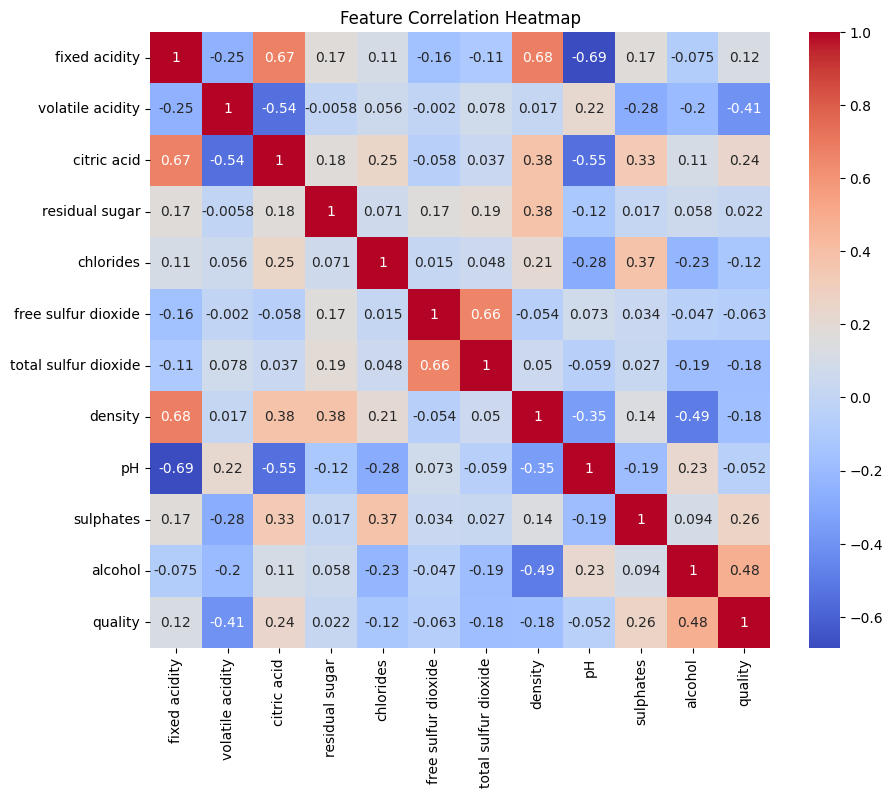

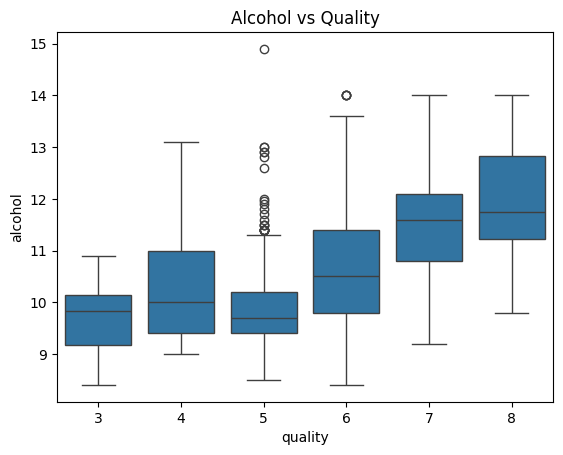

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol vs Quality")
plt.show()

5.  Prepare Features and Labels

In [10]:
X = df.drop('quality', axis=1)
#y = df['quality']
y = df['quality'].apply(lambda x: 1 if x >= 7 else 0)  # good = 1, bad = 0

6. training and testing multiple models

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)


7. evaluating the performance of the models

In [13]:
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("SGD:\n", classification_report(y_test, sgd_pred))
print("SVC:\n", classification_report(y_test, svc_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))


Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       201
           1       0.70      0.57      0.63        28

    accuracy                           0.92       229
   macro avg       0.82      0.77      0.79       229
weighted avg       0.91      0.92      0.91       229

SGD:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       201
           1       0.50      0.21      0.30        28

    accuracy                           0.88       229
   macro avg       0.70      0.59      0.62       229
weighted avg       0.85      0.88      0.86       229

SVC:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       201
           1       1.00      0.04      0.07        28

    accuracy                           0.88       229
   macro avg       0.94      0.52      0.50       229
weighted avg       0.90      0.88      0.83   